In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import glob
import os

# Get all CSV files from the falling_data folder
folder_path = r"C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\falling_data"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

print(f"Found {len(csv_files)} CSV files in the folder:")
for file in csv_files:
    print(f"  - {os.path.basename(file)}")

# Read all CSV files and concatenate them into a single dataframe
df_list = []
for file in csv_files:
    df_temp = pd.read_csv(file)
    df_list.append(df_temp)

# Concatenate all dataframes
df_full = pd.concat(df_list, ignore_index=True)

print(f"\nCombined dataframe shape: {df_full.shape}")
print(f"Total rows: {df_full.shape[0]}")
print(f"Total columns: {df_full.shape[1]}")
print(f"\nFirst few rows:")
df_full.head()


Found 23 CSV files in the folder:
  - falling_20260103_170108.csv
  - falling_20260103_170124.csv
  - falling_20260103_170142.csv
  - falling_20260103_170205.csv
  - falling_20260103_170222.csv
  - falling_20260103_170237.csv
  - falling_20260103_170259.csv
  - falling_20260103_170338.csv
  - falling_20260103_170357.csv
  - falling_20260103_170429.csv
  - falling_20260103_170448.csv
  - falling_20260103_170522.csv
  - falling_20260103_170843.csv
  - falling_20260103_170912.csv
  - falling_20260103_170928.csv
  - falling_20260103_171004.csv
  - falling_20260103_171018.csv
  - falling_20260103_171107.csv
  - falling_20260103_171149.csv
  - falling_20260103_171214.csv
  - falling_20260103_171251.csv
  - falling_20260103_171313.csv
  - falling_20260103_171331.csv

Combined dataframe shape: (9130, 9)
Total rows: 9130
Total columns: 9

First few rows:


,Device,timestamp,ax,ay,az,gx,gy,gz,activity
0,B,683335,-0.942749,-0.184937,-0.266479,0.244141,0.732422,0.793457,falling
1,A,1069790,-0.987793,0.140991,0.091064,0.915528,-1.586915,0.610352,falling
2,B,683355,-0.941162,-0.178711,-0.269287,0.183106,0.915528,0.976563,falling
3,A,1069810,-0.991211,0.123047,0.089111,0.854492,-1.525879,0.915528,falling
4,B,683375,-0.942749,-0.171143,-0.266479,-0.915528,0.976563,0.854492,falling


In [3]:
# Separate the df based on device type
df_A = df_full[df_full['Device'] == 'A'].reset_index(drop=True)
df_B = df_full[df_full['Device'] == 'B'].reset_index(drop=True)

print(f"Device A samples: {len(df_A)}")
print(f"Device B samples: {len(df_B)}")
print(df_A)

Device A samples: 4563
Device B samples: 4567
     Device  timestamp        ax        ay        az        gx        gy  \
0         A    1069790 -0.987793  0.140991  0.091064  0.915528 -1.586915   
1         A    1069810 -0.991211  0.123047  0.089111  0.854492 -1.525879   
2         A    1069830 -0.992188  0.116699  0.089722 -0.244141 -1.464844   
3         A    1069850 -0.990234  0.126343  0.093750  0.976563 -1.708985   
4         A    1069870 -0.991455  0.121582  0.095093  2.258301 -1.770020   
...     ...        ...       ...       ...       ...       ...       ...   
4558      A    1817351 -0.134766 -0.299438 -0.938843 -0.488281 -0.854492   
4559      A    1817371 -0.134888 -0.298950 -0.939209 -0.488281 -0.854492   
4560      A    1817391 -0.134766 -0.299561 -0.939087 -0.488281 -0.854492   
4561      A    1817411 -0.134399 -0.299194 -0.939087 -0.549316 -0.854492   
4562      A    1817431 -0.135620 -0.299194 -0.939453 -0.488281 -0.854492   

            gz activity  
0     0.610352 

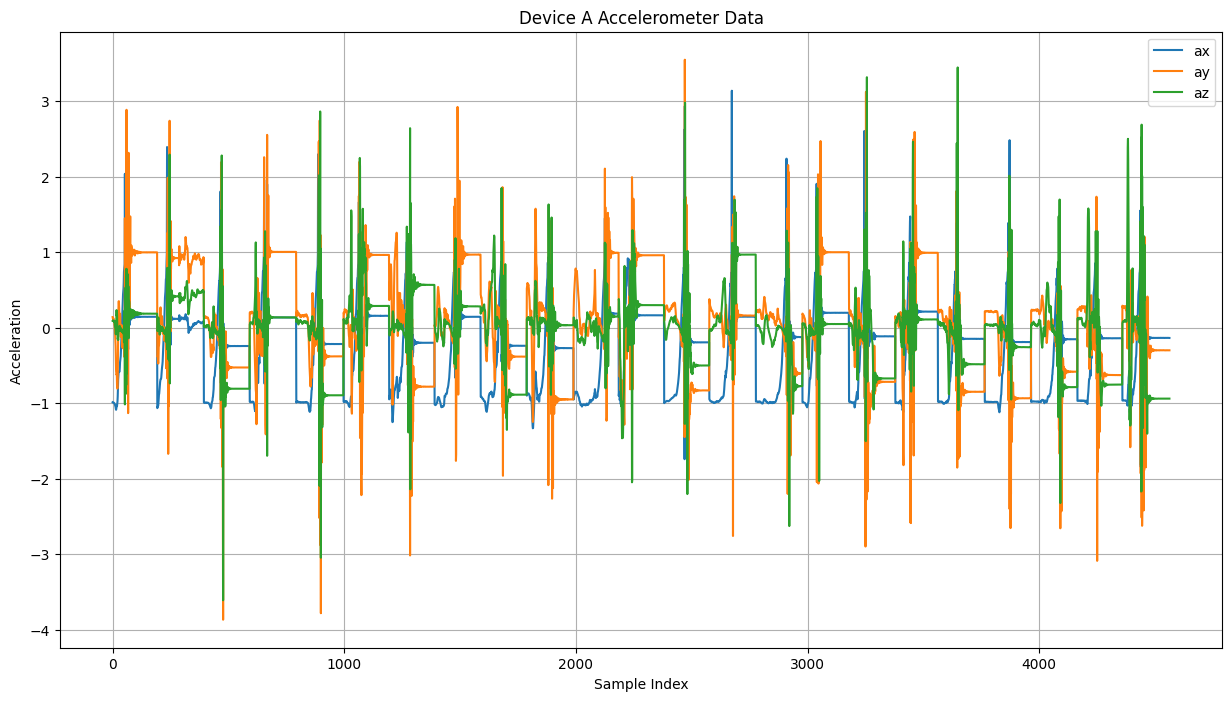

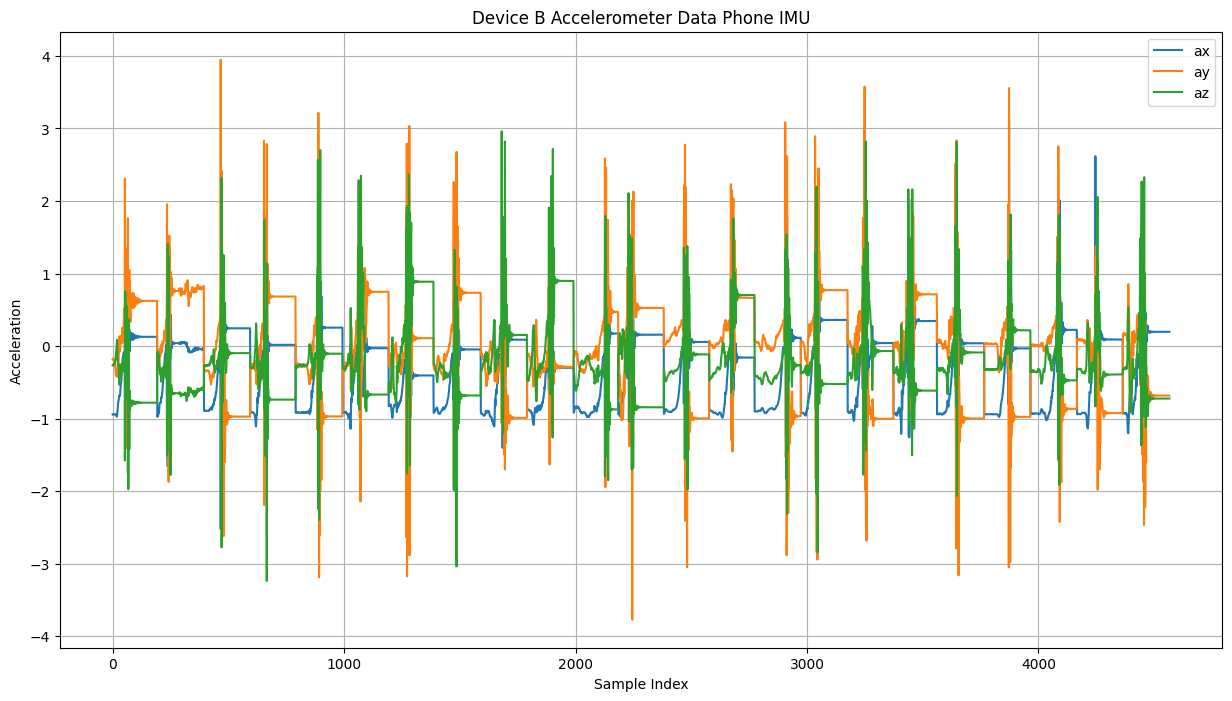

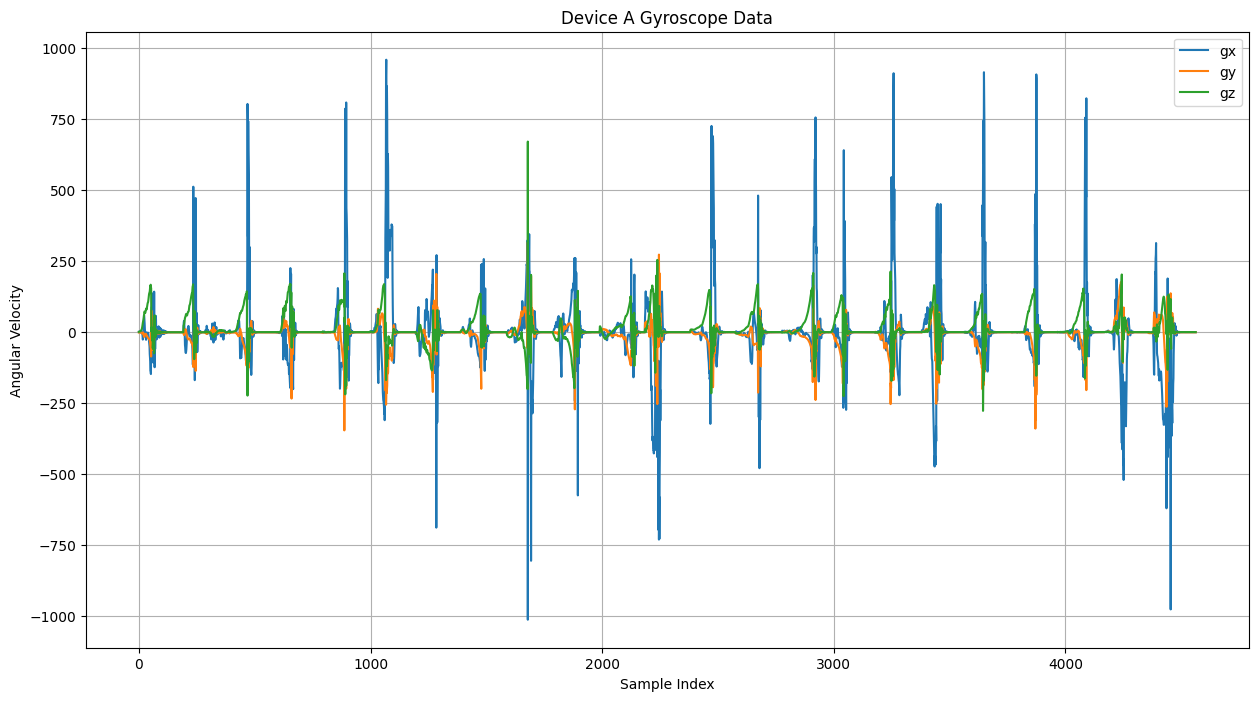

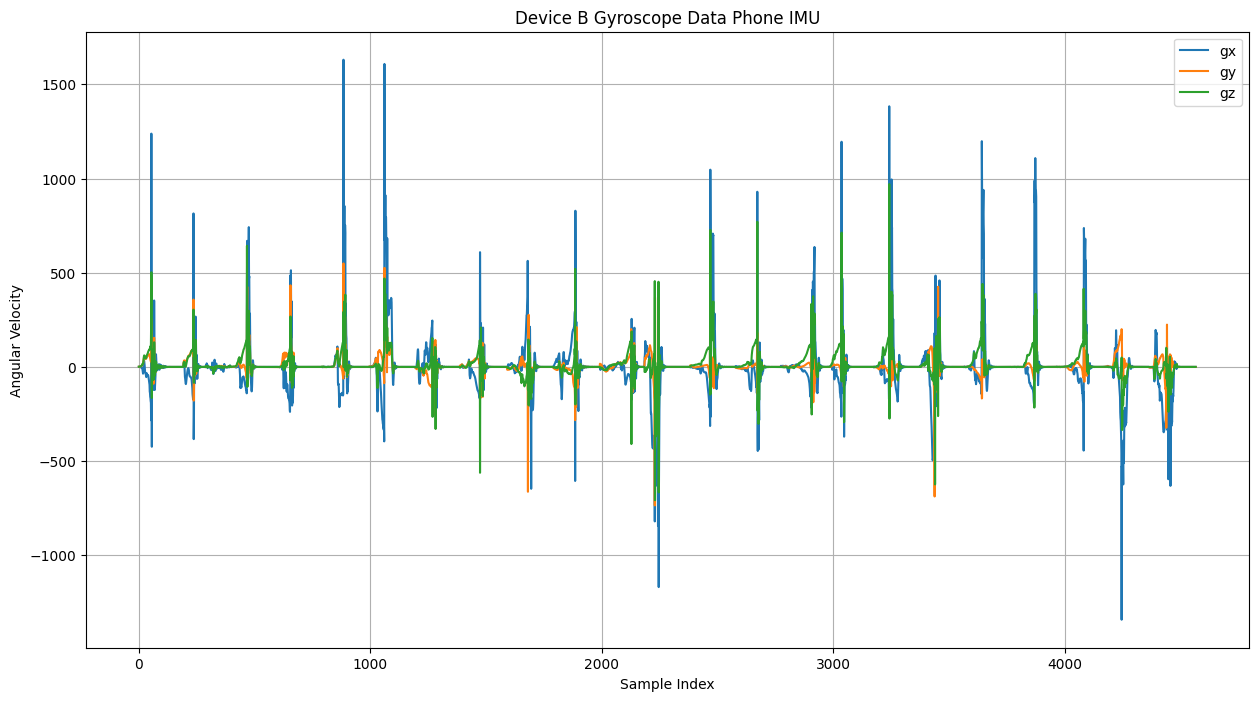

In [4]:
# plot the ax, ay, az for device A
plt.figure(figsize=(15, 8))
plt.plot(df_A['ax'], label='ax')
plt.plot(df_A['ay'], label='ay')
plt.plot(df_A['az'], label='az')
plt.title('Device A Accelerometer Data')
plt.xlabel('Sample Index')
plt.ylabel('Acceleration')
plt.legend()
plt.grid()
plt.show()

# plot the ax, ay, az for device B
plt.figure(figsize=(15, 8))
plt.plot(df_B['ax'], label='ax')
plt.plot(df_B['ay'], label='ay')
plt.plot(df_B['az'], label='az')
plt.title('Device B Accelerometer Data Phone IMU')
plt.xlabel('Sample Index')
plt.ylabel('Acceleration')
plt.legend()
plt.grid()
plt.show()

# plot the gx, gy, gz for device A
plt.figure(figsize=(15, 8))
plt.plot(df_A['gx'], label='gx')
plt.plot(df_A['gy'], label='gy')
plt.plot(df_A['gz'], label='gz')
plt.title('Device A Gyroscope Data')
plt.xlabel('Sample Index')
plt.ylabel('Angular Velocity')
plt.legend()
plt.grid()
plt.show()

# plot the gx, gy, gz for device B
plt.figure(figsize=(15, 8))
plt.plot(df_B['gx'], label='gx')
plt.plot(df_B['gy'], label='gy')
plt.plot(df_B['gz'], label='gz')
plt.title('Device B Gyroscope Data Phone IMU')
plt.xlabel('Sample Index')
plt.ylabel('Angular Velocity')
plt.legend()
plt.grid()
plt.show()


In [5]:
# Create sliding window dataframe from df_A
# Window size: 200 samples per entry
# Target: < 120 divisions

window_size = 200
total_samples = len(df_A)

# Calculate step size to get approximately <120 divisions
target_divisions = 23
step_size = (total_samples - window_size) // (target_divisions - 1)

print(f"Total samples in df_A: {total_samples}")
print(f"Window size: {window_size}")
print(f"Step size: {step_size}")

# Create sliding windows
windows = []
for i in range(0, total_samples - window_size + 1, step_size):
    window = df_A.iloc[i:i+window_size].copy()
    windows.append(window)
    
print(f"Number of windows created: {len(windows)}")

# Create a list to store each window's data
windowed_data = []
for idx, window in enumerate(windows):
    # Create a dictionary with window metadata and flattened sensor data
    window_dict = {
        'window_id': idx,
        'start_idx': idx * step_size,
        'end_idx': idx * step_size + window_size - 1,
    }
    
    # Add flattened sensor readings
    for col in ['ax', 'ay', 'az', 'gx', 'gy', 'gz']:
        for i, val in enumerate(window[col].values):
            window_dict[f'{col}_{i}'] = val
    
    windowed_data.append(window_dict)

# Create the new dataframe
df_A_windowed = pd.DataFrame(windowed_data)

print(f"\nWindowed dataframe shape: {df_A_windowed.shape}")
print(f"Columns: window_id, start_idx, end_idx, + {6 * window_size} sensor readings")
df_A_windowed.head()

Total samples in df_A: 4563
Window size: 200
Step size: 198
Number of windows created: 23

Windowed dataframe shape: (23, 1203)
Columns: window_id, start_idx, end_idx, + 1200 sensor readings


,window_id,start_idx,end_idx,ax_0,ax_1,ax_2,ax_3,ax_4,ax_5,ax_6,...,gz_190,gz_191,gz_192,gz_193,gz_194,gz_195,gz_196,gz_197,gz_198,gz_199
0,0,0,199,-0.987793,-0.991211,-0.992188,-0.990234,-0.991455,-0.993774,-0.995850,...,-0.610352,-0.610352,-0.610352,21.545410,24.230965,27.282722,31.555183,36.499023,42.968750,49.987808
1,1,198,397,-0.991699,-0.938965,-0.885376,-0.875244,-0.843140,-0.800171,-0.755493,...,1.098633,1.525879,2.441406,3.173829,2.319336,1.831055,-0.549316,-0.488281,0.000000,0.183106
2,2,396,595,-0.994629,-0.992676,-0.993896,-0.995483,-0.992676,-0.990479,-0.990845,...,-0.122070,-0.183106,-0.183106,-0.183106,-0.183106,-0.122070,0.000000,0.061035,-0.122070,-0.366211
3,3,594,793,-0.981445,-0.983521,-0.982910,-0.986938,-0.985474,-0.984863,-0.981567,...,-0.122070,-0.122070,-0.183106,-0.122070,-0.122070,-0.122070,-0.183106,-0.122070,-0.183106,1.953125
4,4,792,991,0.135376,-0.992310,-0.982666,-0.978271,-0.977661,-0.973389,-0.975220,...,-0.183106,-0.183106,-0.183106,-0.183106,-0.183106,-0.183106,-0.183106,-0.183106,-0.183106,-0.183106


In [6]:
# Load all CSV files from falling_data directory
# Store each as a separate dimension (3D numpy array with shape property)
import glob
import os

folder_path = r"C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\falling_data"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

print(f"Found {len(csv_files)} CSV files")

# First pass: collect dataframes to determine common shape
temp_dfs_A = []
temp_dfs_B = []

for idx, file_path in enumerate(csv_files):
    filename = os.path.basename(file_path)
    df_temp = pd.read_csv(file_path)
    
    # Separate device A and B for this file
    df_temp_A = df_temp[df_temp['Device'] == 'A'].reset_index(drop=True)
    df_temp_B = df_temp[df_temp['Device'] == 'B'].reset_index(drop=True)
    
    temp_dfs_A.append(df_temp_A)
    temp_dfs_B.append(df_temp_B)
    
    print(f"File {idx}: {filename} - Device A: {df_temp_A.shape}, Device B: {df_temp_B.shape}")

# Determine the minimum shape to make consistent arrays
sensor_columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
min_rows_A = min(df.shape[0] for df in temp_dfs_A)
min_rows_B = min(df.shape[0] for df in temp_dfs_B)

print(f"\nMinimum rows - Device A: {min_rows_A}, Device B: {min_rows_B}")

# Create 3D numpy arrays: (num_files, num_samples, num_sensors)
all_dataframes_A = np.zeros((len(temp_dfs_A), min_rows_A, len(sensor_columns)))
all_dataframes_B = np.zeros((len(temp_dfs_B), min_rows_B, len(sensor_columns)))

# Fill the arrays
for file_idx, df_A in enumerate(temp_dfs_A):
    for sensor_idx, sensor in enumerate(sensor_columns):
        all_dataframes_A[file_idx, :, sensor_idx] = df_A[sensor].values[:min_rows_A]

for file_idx, df_B in enumerate(temp_dfs_B):
    for sensor_idx, sensor in enumerate(sensor_columns):
        all_dataframes_B[file_idx, :, sensor_idx] = df_B[sensor].values[:min_rows_B]

print(f"\nall_dataframes_A shape: {all_dataframes_A.shape}")
print(f"  - Axis 0 (files): {all_dataframes_A.shape[0]} files")
print(f"  - Axis 1 (samples): {all_dataframes_A.shape[1]} samples per file")
print(f"  - Axis 2 (sensors): {all_dataframes_A.shape[2]} sensors {sensor_columns}")

print(f"\nall_dataframes_B shape: {all_dataframes_B.shape}")
print(f"  - Axis 0 (files): {all_dataframes_B.shape[0]} files")
print(f"  - Axis 1 (samples): {all_dataframes_B.shape[1]} samples per file")
print(f"  - Axis 2 (sensors): {all_dataframes_B.shape[2]} sensors {sensor_columns}")

print(f"\nFirst file, first 5 samples (Device A):")
print(pd.DataFrame(all_dataframes_A[0, :5, :], columns=sensor_columns))
print(all_dataframes_A.shape)

Found 23 CSV files
File 0: falling_20260103_170108.csv - Device A: (193, 9), Device B: (193, 9)
File 1: falling_20260103_170124.csv - Device A: (201, 9), Device B: (202, 9)
File 2: falling_20260103_170142.csv - Device A: (198, 9), Device B: (200, 9)
File 3: falling_20260103_170205.csv - Device A: (201, 9), Device B: (196, 9)
File 4: falling_20260103_170222.csv - Device A: (204, 9), Device B: (203, 9)
File 5: falling_20260103_170237.csv - Device A: (197, 9), Device B: (199, 9)
File 6: falling_20260103_170259.csv - Device A: (196, 9), Device B: (194, 9)
File 7: falling_20260103_170338.csv - Device A: (199, 9), Device B: (204, 9)
File 8: falling_20260103_170357.csv - Device A: (199, 9), Device B: (200, 9)
File 9: falling_20260103_170429.csv - Device A: (202, 9), Device B: (201, 9)
File 10: falling_20260103_170448.csv - Device A: (195, 9), Device B: (193, 9)
File 11: falling_20260103_170522.csv - Device A: (196, 9), Device B: (197, 9)
File 12: falling_20260103_170843.csv - Device A: (195, 

In [7]:
# Create sliding windows from all_dataframes_A
# For each file, split the 184 samples into 2 windows of size 146

window_size = 146
target_divisions = 2
num_files = all_dataframes_A.shape[0]
num_samples = all_dataframes_A.shape[1]
num_sensors = all_dataframes_A.shape[2]

# Calculate step size for sliding windows
step_size = (num_samples - window_size) // (target_divisions - 1)

print(f"Input shape: {all_dataframes_A.shape}")
print(f"Window size: {window_size}")
print(f"Target divisions: {target_divisions}")
print(f"Step size: {step_size}")

# Create 4D array: (num_files, num_windows, window_size, num_sensors)
windowed_data_A = np.zeros((num_files, target_divisions, window_size, num_sensors))

# Create sliding windows for each file
for file_idx in range(num_files):
    window_idx = 0
    for start in range(0, num_samples - window_size + 1, step_size):
        if window_idx >= target_divisions:
            break
        end = start + window_size
        windowed_data_A[file_idx, window_idx, :, :] = all_dataframes_A[file_idx, start:end, :]
        window_idx += 1

print(f"\nWindowed data shape: {windowed_data_A.shape}")
print(f"  - Axis 0 (files): {windowed_data_A.shape[0]} files")
print(f"  - Axis 1 (windows per file): {windowed_data_A.shape[1]} windows")
print(f"  - Axis 2 (samples per window): {windowed_data_A.shape[2]} samples")
print(f"  - Axis 3 (sensors): {windowed_data_A.shape[3]} sensors {sensor_columns}")

print(f"\nFirst file, first window, first 5 samples:")
print(pd.DataFrame(windowed_data_A[0, 0, :5, :], columns=sensor_columns))


Input shape: (23, 184, 6)
Window size: 146
Target divisions: 2
Step size: 38

Windowed data shape: (23, 2, 146, 6)
  - Axis 0 (files): 23 files
  - Axis 1 (windows per file): 2 windows
  - Axis 2 (samples per window): 146 samples
  - Axis 3 (sensors): 6 sensors ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

First file, first window, first 5 samples:
         ax        ay        az        gx        gy        gz
0 -0.987793  0.140991  0.091064  0.915528 -1.586915  0.610352
1 -0.991211  0.123047  0.089111  0.854492 -1.525879  0.915528
2 -0.992188  0.116699  0.089722 -0.244141 -1.464844  1.525879
3 -0.990234  0.126343  0.093750  0.976563 -1.708985  2.014160
4 -0.991455  0.121582  0.095093  2.258301 -1.770020  2.136230


In [8]:
# Create sliding windows from all_dataframes_B
# For each file, split the samples into 2 windows of size 146

window_size_B = 146
target_divisions_B = 2
num_files_B = all_dataframes_B.shape[0]
num_samples_B = all_dataframes_B.shape[1]
num_sensors_B = all_dataframes_B.shape[2]

# Calculate step size for sliding windows
step_size_B = (num_samples_B - window_size_B) // (target_divisions_B - 1)

print(f"Input shape: {all_dataframes_B.shape}")
print(f"Window size: {window_size_B}")
print(f"Target divisions: {target_divisions_B}")
print(f"Step size: {step_size_B}")

# Create 4D array: (num_files, num_windows, window_size, num_sensors)
windowed_data_B = np.zeros((num_files_B, target_divisions_B, window_size_B, num_sensors_B))

# Create sliding windows for each file
for file_idx in range(num_files_B):
    window_idx = 0
    for start in range(0, num_samples_B - window_size_B + 1, step_size_B):
        if window_idx >= target_divisions_B:
            break
        end = start + window_size_B
        windowed_data_B[file_idx, window_idx, :, :] = all_dataframes_B[file_idx, start:end, :]
        window_idx += 1

print(f"\nWindowed data shape: {windowed_data_B.shape}")
print(f"  - Axis 0 (files): {windowed_data_B.shape[0]} files")
print(f"  - Axis 1 (windows per file): {windowed_data_B.shape[1]} windows")
print(f"  - Axis 2 (samples per window): {windowed_data_B.shape[2]} samples")
print(f"  - Axis 3 (sensors): {windowed_data_B.shape[3]} sensors {sensor_columns}")

print(f"\nFirst file, first window, first 5 samples:")
print(pd.DataFrame(windowed_data_B[0, 0, :5, :], columns=sensor_columns))


Input shape: (23, 188, 6)
Window size: 146
Target divisions: 2
Step size: 42

Windowed data shape: (23, 2, 146, 6)
  - Axis 0 (files): 23 files
  - Axis 1 (windows per file): 2 windows
  - Axis 2 (samples per window): 146 samples
  - Axis 3 (sensors): 6 sensors ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

First file, first window, first 5 samples:
         ax        ay        az        gx        gy        gz
0 -0.942749 -0.184937 -0.266479  0.244141  0.732422  0.793457
1 -0.941162 -0.178711 -0.269287  0.183106  0.915528  0.976563
2 -0.942749 -0.171143 -0.266479 -0.915528  0.976563  0.854492
3 -0.941895 -0.175293 -0.267456 -0.061035  1.342773  1.342773
4 -0.940430 -0.188477 -0.266113  1.220703  1.953125  2.075195


In [9]:
# Calculate difference between consecutive windows along axis 1 (window dimension)
# For each file, compute: window[1] - window[0]
# Shape changes from (23, 2, 146, 6) to (23, 146, 6)

# Calculate differences between consecutive windows for each file
windowed_data_A_diff = np.diff(windowed_data_A, axis=1)

print(f"Original windowed_data_A shape: {windowed_data_A.shape}")
print(f"After diff along axis 1: {windowed_data_A_diff.shape}")

# Squeeze the dimension of size 1 to get (23, 146, 6)
windowed_data_A_diff = windowed_data_A_diff.squeeze(axis=1)

print(f"After squeeze: {windowed_data_A_diff.shape}")
print(f"\nShape breakdown:")
print(f"  - Axis 0 (files): {windowed_data_A_diff.shape[0]} files")
print(f"  - Axis 1 (samples): {windowed_data_A_diff.shape[1]} samples")
print(f"  - Axis 2 (sensors): {windowed_data_A_diff.shape[2]} sensors {sensor_columns}")

print(f"\nFirst file, first 5 samples (difference between windows):")
print(pd.DataFrame(windowed_data_A_diff[0, :5, :], columns=sensor_columns))


Original windowed_data_A shape: (23, 2, 146, 6)
After diff along axis 1: (23, 1, 146, 6)
After squeeze: (23, 146, 6)

Shape breakdown:
  - Axis 0 (files): 23 files
  - Axis 1 (samples): 146 samples
  - Axis 2 (sensors): 6 sensors ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

First file, first 5 samples (difference between windows):
         ax        ay        az         gx         gy          gz
0  0.851318 -0.120239 -0.131591  -9.704591 -16.357421  101.745636
1  0.920776 -0.088989 -0.124756  -4.821778 -18.249512  102.478057
2  1.020386 -0.216308 -0.143555  -2.014160 -20.141601  104.919464
3  1.095214 -0.339478 -0.147949  -8.361819 -20.568855  110.107453
4  1.189087 -0.382568 -0.145386 -17.578129 -20.874031  118.530304


In [10]:
# Calculate difference between consecutive windows along axis 1 (window dimension) for Device B
# For each file, compute: window[1] - window[0]
# Shape changes from (23, 2, 146, 6) to (23, 146, 6)

# Calculate differences between consecutive windows for each file
windowed_data_B_diff = np.diff(windowed_data_B, axis=1)

print(f"Original windowed_data_B shape: {windowed_data_B.shape}")
print(f"After diff along axis 1: {windowed_data_B_diff.shape}")

# Squeeze the dimension of size 1 to get (23, 146, 6)
windowed_data_B_diff = windowed_data_B_diff.squeeze(axis=1)

print(f"After squeeze: {windowed_data_B_diff.shape}")
print(f"\nShape breakdown:")
print(f"  - Axis 0 (files): {windowed_data_B_diff.shape[0]} files")
print(f"  - Axis 1 (samples): {windowed_data_B_diff.shape[1]} samples")
print(f"  - Axis 2 (sensors): {windowed_data_B_diff.shape[2]} sensors {sensor_columns}")

print(f"\nFirst file, first 5 samples (difference between windows):")
print(pd.DataFrame(windowed_data_B_diff[0, :5, :], columns=sensor_columns))


Original windowed_data_B shape: (23, 2, 146, 6)
After diff along axis 1: (23, 1, 146, 6)
After squeeze: (23, 146, 6)

Shape breakdown:
  - Axis 0 (files): 23 files
  - Axis 1 (samples): 146 samples
  - Axis 2 (sensors): 6 sensors ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

First file, first 5 samples (difference between windows):
         ax        ay        az         gx         gy         gz
0  0.726685  0.440430 -0.092530 -57.800309  64.575195  84.228516
1  0.766113  0.425781 -0.074341 -67.077637  65.429687  86.547851
2  0.782593  0.372681 -0.006104 -74.218749  65.917968  89.355499
3  0.786622  0.305786  0.071411 -82.092285  65.551758  91.430695
4  0.810059  0.280518  0.081054 -95.947296  63.903809  91.918976


In [11]:
# Calculate statistical features for windowed_data_A_diff
# For each of the 23 files, compute statistics across the 146 samples for each sensor
# Shape: (23, 7, 6) where 23=files, 7=statistics, 6=sensors

num_files = windowed_data_A_diff.shape[0]
num_samples = windowed_data_A_diff.shape[1]
num_sensors = windowed_data_A_diff.shape[2]

# Define statistical functions to compute
stat_functions = {
    'mean': np.mean,
    'std': np.std,
    'min': np.min,
    'max': np.max,
    'median': np.median,
    'q25': lambda x: np.percentile(x, 25),
    'q75': lambda x: np.percentile(x, 75)
}

num_stats = len(stat_functions)

# Create 3D array: (num_files, num_stats, num_sensors)
stats_A_diff_3d = np.zeros((num_files, num_stats, num_sensors))

# Compute statistics for each file and sensor
for file_idx in range(num_files):
    for sensor_idx, sensor in enumerate(sensor_columns):
        # Extract the time series for this file and sensor (146 samples)
        time_series = windowed_data_A_diff[file_idx, :, sensor_idx]
        
        # Compute each statistic
        for stat_idx, (stat_name, stat_func) in enumerate(stat_functions.items()):
            value = stat_func(time_series)
            stats_A_diff_3d[file_idx, stat_idx, sensor_idx] = value

print(f"Statistics 3D array shape: {stats_A_diff_3d.shape}")
print(f"  - Axis 0 (files): {stats_A_diff_3d.shape[0]} files")
print(f"  - Axis 1 (statistics): {stats_A_diff_3d.shape[1]} stats {list(stat_functions.keys())}")
print(f"  - Axis 2 (sensors): {stats_A_diff_3d.shape[2]} sensors {sensor_columns}")

print(f"\nFirst file statistics for all sensors:")
stat_names = list(stat_functions.keys())
print(pd.DataFrame(stats_A_diff_3d[0, :, :], columns=sensor_columns, index=stat_names))

print(f"\nShape verification: {stats_A_diff_3d.shape}")


Statistics 3D array shape: (23, 7, 6)
  - Axis 0 (files): 23 files
  - Axis 1 (statistics): 7 stats ['mean', 'std', 'min', 'max', 'median', 'q25', 'q75']
  - Axis 2 (sensors): 6 sensors ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

First file statistics for all sensors:
              ax        ay            az          gx         gy          gz
mean    0.250844  0.289851  4.421703e-02   -0.659263   1.391267  -10.790682
std     0.650001  0.689595  3.228990e-01   56.255526  24.125926   71.228028
min    -1.895752 -1.886230 -1.072998e+00 -146.911621 -80.627441 -166.137695
max     3.126832  3.585205  1.186157e+00  163.085941  81.542968  155.151363
median  0.000916  0.000976  1.387779e-17   -0.030518   0.000000   -0.030517
q25    -0.003052 -0.010590 -4.223650e-02  -15.258793  -3.234864  -25.100714
q75     0.376801  0.676819  1.555178e-01    9.201051   6.973268    0.976563

Shape verification: (23, 7, 6)


In [12]:
# Calculate statistical features for windowed_data_B_diff
# For each of the 23 files, compute statistics across the 146 samples for each sensor
# Shape: (23, 7, 6) where 23=files, 7=statistics, 6=sensors

num_files_B = windowed_data_B_diff.shape[0]
num_samples_B = windowed_data_B_diff.shape[1]
num_sensors_B = windowed_data_B_diff.shape[2]

# Define statistical functions to compute
stat_functions = {
    'mean': np.mean,
    'std': np.std,
    'min': np.min,
    'max': np.max,
    'median': np.median,
    'q25': lambda x: np.percentile(x, 25),
    'q75': lambda x: np.percentile(x, 75)
}

num_stats = len(stat_functions)

# Create 3D array: (num_files, num_stats, num_sensors)
stats_B_diff_3d = np.zeros((num_files_B, num_stats, num_sensors_B))

# Compute statistics for each file and sensor
for file_idx in range(num_files_B):
    for sensor_idx, sensor in enumerate(sensor_columns):
        # Extract the time series for this file and sensor (146 samples)
        time_series = windowed_data_B_diff[file_idx, :, sensor_idx]
        
        # Compute each statistic
        for stat_idx, (stat_name, stat_func) in enumerate(stat_functions.items()):
            value = stat_func(time_series)
            stats_B_diff_3d[file_idx, stat_idx, sensor_idx] = value

print(f"Statistics 3D array shape for Device B: {stats_B_diff_3d.shape}")
print(f"  - Axis 0 (files): {stats_B_diff_3d.shape[0]} files")
print(f"  - Axis 1 (statistics): {stats_B_diff_3d.shape[1]} stats {list(stat_functions.keys())}")
print(f"  - Axis 2 (sensors): {stats_B_diff_3d.shape[2]} sensors {sensor_columns}")

print(f"\nFirst file statistics for all sensors:")
stat_names = list(stat_functions.keys())
print(pd.DataFrame(stats_B_diff_3d[0, :, :], columns=sensor_columns, index=stat_names))

print(f"\nShape verification: {stats_B_diff_3d.shape}")


Statistics 3D array shape for Device B: (23, 7, 6)
  - Axis 0 (files): 23 files
  - Axis 1 (statistics): 7 stats ['mean', 'std', 'min', 'max', 'median', 'q25', 'q75']
  - Axis 2 (sensors): 6 sensors ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

First file statistics for all sensors:
              ax        ay        az           gx          gy          gz
mean    0.263110  0.223347 -0.154769     4.635328   -8.680790   -9.808686
std     0.415651  0.523972  0.441009   175.343163   59.223223   99.865458
min    -0.959839 -1.626221 -1.720825 -1229.614258 -252.136290 -497.802857
max     1.859864  2.576538  1.190063  1242.675782  249.267637  495.483519
median  0.016723  0.027710 -0.003234     0.183106   -0.030517   -0.061035
q25     0.000122 -0.006683 -0.396179    -9.735108  -35.263071  -54.107681
q75     0.577331  0.425049  0.003266    37.887584    2.059936    5.416872

Shape verification: (23, 7, 6)


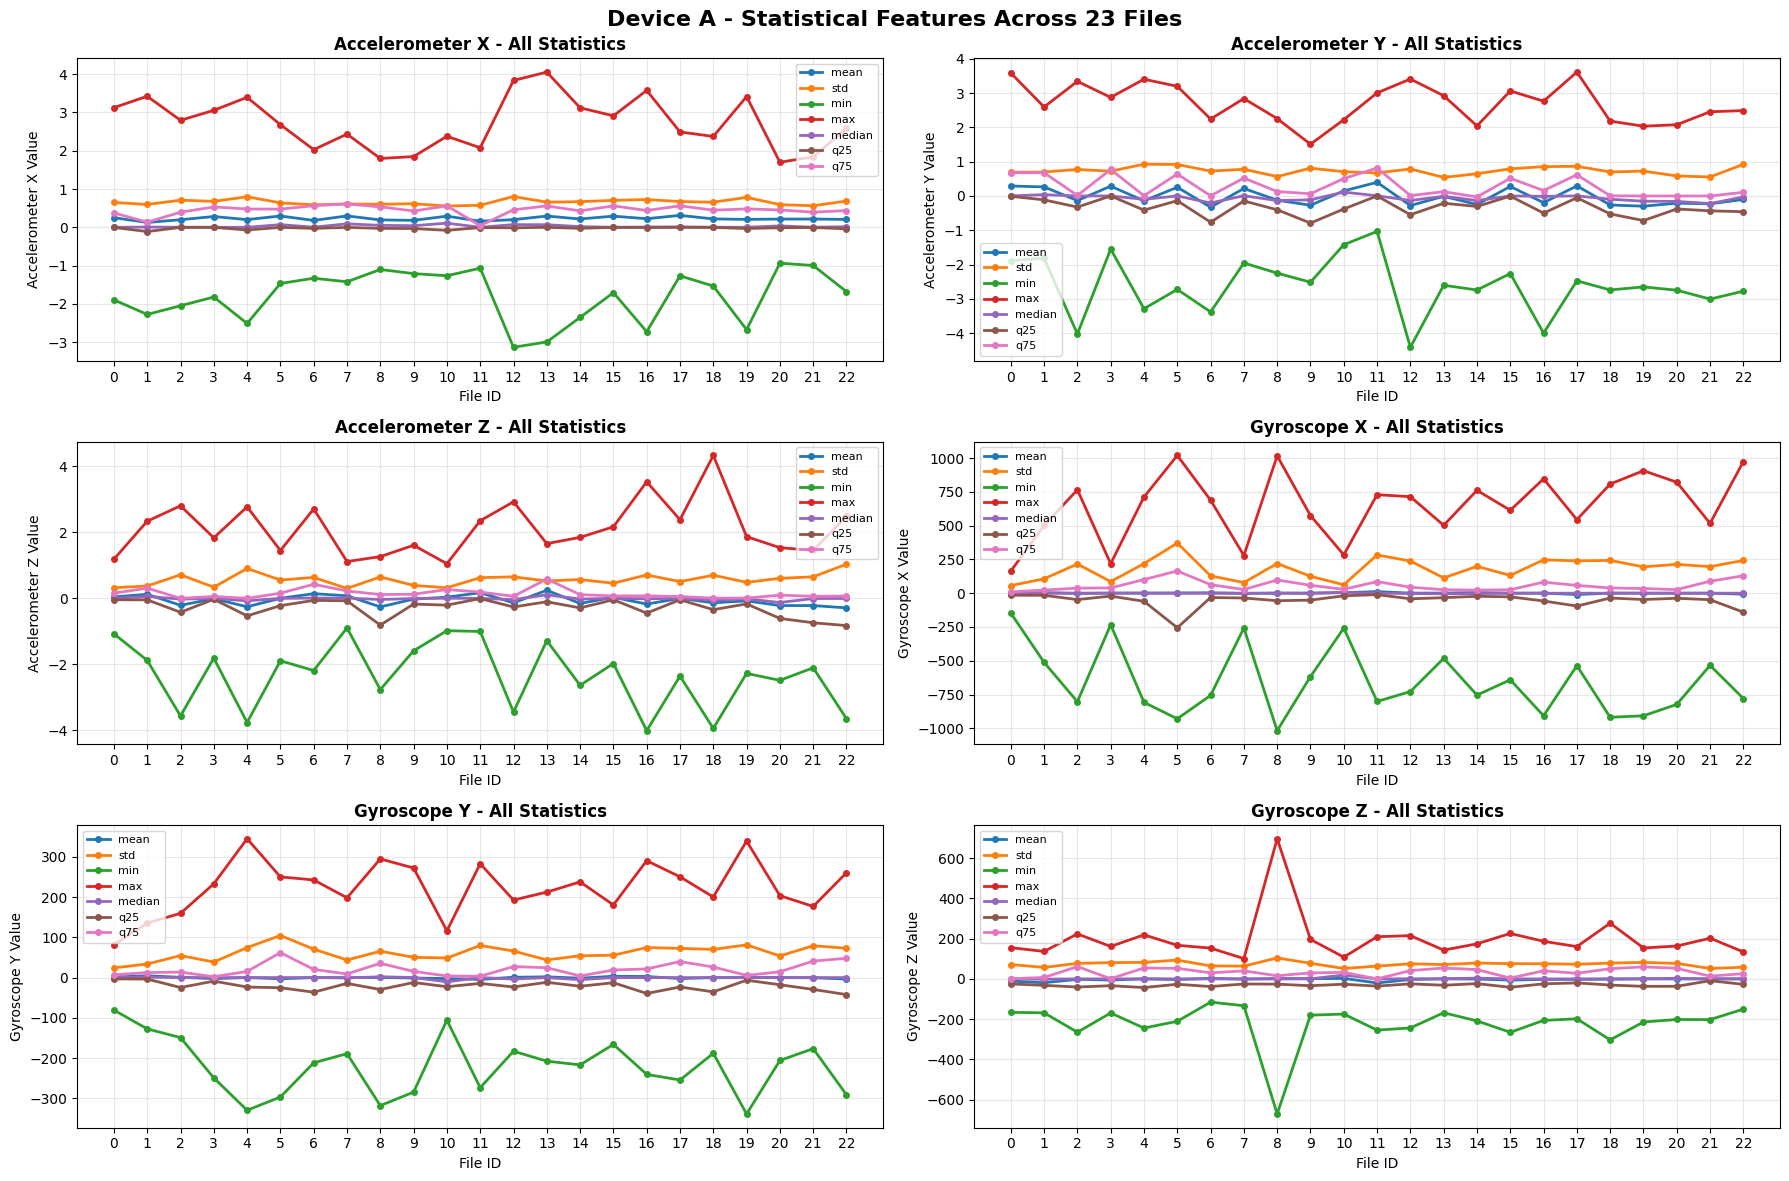

In [13]:
# Plot statistical features for stats_A_diff_3d across all 23 files
# Separate plots for each sensor (ax, ay, az, gx, gy, gz)

fig, axes = plt.subplots(3, 2, figsize=(18, 12))
fig.suptitle('Device A - Statistical Features Across 23 Files', fontsize=16, fontweight='bold')

sensors = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
sensor_labels = ['Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 
                 'Gyroscope X', 'Gyroscope Y', 'Gyroscope Z']
stat_names = ['mean', 'std', 'min', 'max', 'median', 'q25', 'q75']

file_ids = np.arange(stats_A_diff_3d.shape[0])

for sensor_idx, (sensor, label) in enumerate(zip(sensors, sensor_labels)):
    row = sensor_idx // 2
    col = sensor_idx % 2
    ax = axes[row, col]
    
    # Plot each statistic across all files for this sensor
    for stat_idx, stat_name in enumerate(stat_names):
        values = stats_A_diff_3d[:, stat_idx, sensor_idx]
        ax.plot(file_ids, values, marker='o', label=stat_name, linewidth=2, markersize=4)
    
    ax.set_xlabel('File ID', fontsize=10)
    ax.set_ylabel(f'{label} Value', fontsize=10)
    ax.set_title(f'{label} - All Statistics', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(file_ids)

plt.tight_layout()
plt.show()


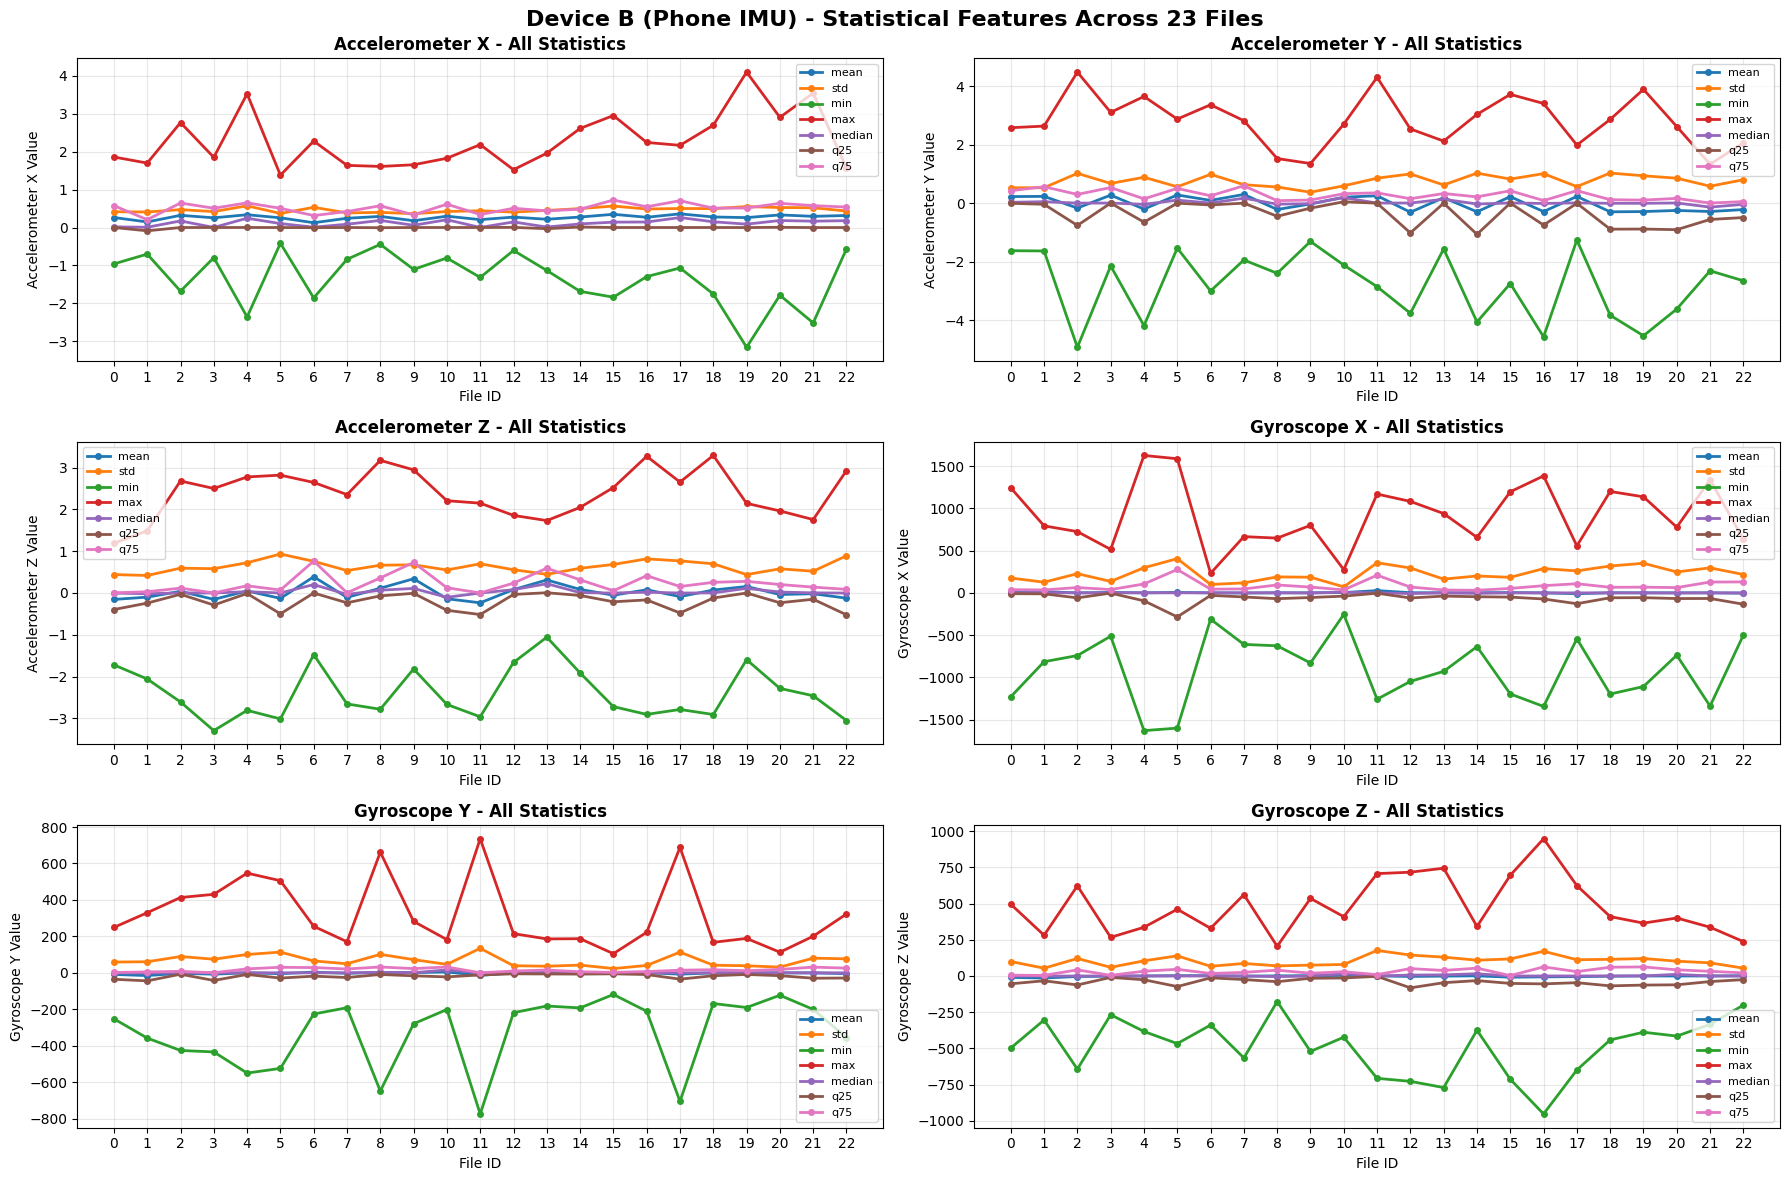

In [14]:
# Plot statistical features for stats_B_diff_3d across all 23 files
# Separate plots for each sensor (ax, ay, az, gx, gy, gz)

fig, axes = plt.subplots(3, 2, figsize=(18, 12))
fig.suptitle('Device B (Phone IMU) - Statistical Features Across 23 Files', fontsize=16, fontweight='bold')

sensors = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
sensor_labels = ['Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 
                 'Gyroscope X', 'Gyroscope Y', 'Gyroscope Z']
stat_names = ['mean', 'std', 'min', 'max', 'median', 'q25', 'q75']

file_ids = np.arange(stats_B_diff_3d.shape[0])

for sensor_idx, (sensor, label) in enumerate(zip(sensors, sensor_labels)):
    row = sensor_idx // 2
    col = sensor_idx % 2
    ax = axes[row, col]
    
    # Plot each statistic across all files for this sensor
    for stat_idx, stat_name in enumerate(stat_names):
        values = stats_B_diff_3d[:, stat_idx, sensor_idx]
        ax.plot(file_ids, values, marker='o', label=stat_name, linewidth=2, markersize=4)
    
    ax.set_xlabel('File ID', fontsize=10)
    ax.set_ylabel(f'{label} Value', fontsize=10)
    ax.set_title(f'{label} - All Statistics', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(file_ids)

plt.tight_layout()
plt.show()


In [17]:
# Extract max, min, and mean from stats_A_diff_3d and save to CSV
# stats_A_diff_3d shape: (23, 7, 6) where 23=files, 7=statistics, 6=sensors
# Statistics order: mean, std, min, max, median, q25, q75

sensor_columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
stat_names = ['mean', 'std', 'min', 'max', 'median', 'q25', 'q75']

# Get indices for max, min, and mean
stat_indices = {
    'max': 3,
    'min': 2,
    'mean': 0
}

# Create a list to store data for each file
data_rows = []

for file_idx in range(stats_A_diff_3d.shape[0]):
    row_data = {'file_id': file_idx}
    
    # Extract max, min, and mean for each sensor in that order
    for sensor_idx, sensor in enumerate(sensor_columns):
        for stat_name in ['max', 'min', 'mean']:
            stat_idx = stat_indices[stat_name]
            value = stats_A_diff_3d[file_idx, stat_idx, sensor_idx]
            row_data[f'{sensor}_{stat_name}'] = value
    
    data_rows.append(row_data)

# Create DataFrame
df_falling_A = pd.DataFrame(data_rows)

# Add activity column
df_falling_A['activity'] = 'falling'

# Save to CSV
output_file = 'falling_device_A_stats.csv'
df_falling_A.to_csv(output_file, index=False)

print(f"Saved to: {output_file}")
print(f"Shape: {df_falling_A.shape}")
print(f"Columns: {df_falling_A.columns.tolist()}")
print(f"\nFirst few rows:")
df_falling_A.head()


Saved to: falling_device_A_stats.csv
Shape: (23, 20)
Columns: ['file_id', 'ax_max', 'ax_min', 'ax_mean', 'ay_max', 'ay_min', 'ay_mean', 'az_max', 'az_min', 'az_mean', 'gx_max', 'gx_min', 'gx_mean', 'gy_max', 'gy_min', 'gy_mean', 'gz_max', 'gz_min', 'gz_mean', 'activity']

First few rows:


,file_id,ax_max,ax_min,ax_mean,ay_max,ay_min,ay_mean,az_max,az_min,az_mean,gx_max,gx_min,gx_mean,gy_max,gy_min,gy_mean,gz_max,gz_min,gz_mean,activity
0,0,3.126832,-1.895752,0.250844,3.585205,-1.886230,0.289851,1.186157,-1.072998,0.044217,163.085941,-146.911621,-0.659263,81.542968,-80.627441,1.391267,155.151363,-166.137695,-10.790682,falling
1,1,3.423706,-2.276977,0.127269,2.594971,-1.818238,0.263760,2.337280,-1.878173,0.123575,501.342903,-511.963013,2.501188,135.437012,-127.319336,4.380318,136.352532,-168.457031,-18.882441,falling
2,2,2.795532,-2.049805,0.198725,3.341431,-4.025635,-0.134506,2.803711,-3.561401,-0.209563,765.320068,-803.222900,-1.550544,159.545898,-149.047848,0.740365,223.388733,-264.709533,-2.277113,falling
3,3,3.056641,-1.821900,0.281603,2.874634,-1.550293,0.285444,1.834594,-1.809448,-0.011177,218.444883,-233.459548,0.858255,232.910217,-249.084537,-2.588978,161.071775,-169.189453,-5.432129,falling
4,4,3.396485,-2.513062,0.200555,3.404663,-3.289795,-0.142658,2.771851,-3.760865,-0.254041,711.670166,-807.983643,-0.014632,344.726562,-329.406738,0.068560,218.750061,-244.140694,-0.066888,falling


In [18]:
# Extract max, min, and mean from stats_B_diff_3d and save to CSV
# stats_B_diff_3d shape: (23, 7, 6) where 23=files, 7=statistics, 6=sensors
# Statistics order: mean, std, min, max, median, q25, q75

sensor_columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
stat_names = ['mean', 'std', 'min', 'max', 'median', 'q25', 'q75']

# Get indices for max, min, and mean
stat_indices = {
    'max': 3,
    'min': 2,
    'mean': 0
}

# Create a list to store data for each file
data_rows = []

for file_idx in range(stats_B_diff_3d.shape[0]):
    row_data = {'file_id': file_idx}
    
    # Extract max, min, and mean for each sensor in that order
    for sensor_idx, sensor in enumerate(sensor_columns):
        for stat_name in ['max', 'min', 'mean']:
            stat_idx = stat_indices[stat_name]
            value = stats_B_diff_3d[file_idx, stat_idx, sensor_idx]
            row_data[f'{sensor}_{stat_name}'] = value
    
    data_rows.append(row_data)

# Create DataFrame
df_falling_B = pd.DataFrame(data_rows)

# Add activity column
df_falling_B['activity'] = 'falling'

# Save to CSV
output_file = 'falling_device_B_stats.csv'
df_falling_B.to_csv(output_file, index=False)

print(f"Saved to: {output_file}")
print(f"Shape: {df_falling_B.shape}")
print(f"Columns: {df_falling_B.columns.tolist()}")
print(f"\nFirst few rows:")
df_falling_B.head()


Saved to: falling_device_B_stats.csv
Shape: (23, 20)
Columns: ['file_id', 'ax_max', 'ax_min', 'ax_mean', 'ay_max', 'ay_min', 'ay_mean', 'az_max', 'az_min', 'az_mean', 'gx_max', 'gx_min', 'gx_mean', 'gy_max', 'gy_min', 'gy_mean', 'gz_max', 'gz_min', 'gz_mean', 'activity']

First few rows:


,file_id,ax_max,ax_min,ax_mean,ay_max,ay_min,ay_mean,az_max,az_min,az_mean,gx_max,gx_min,gx_mean,gy_max,gy_min,gy_mean,gz_max,gz_min,gz_mean,activity
0,0,1.859864,-0.959839,0.263110,2.576538,-1.626221,0.223347,1.190063,-1.720825,-0.154769,1242.675782,-1229.614258,4.635328,249.267637,-252.136290,-8.680790,495.483519,-497.802857,-9.808686,falling
1,1,1.699340,-0.701660,0.146921,2.631958,-1.635498,0.230189,1.485962,-2.058350,-0.099385,792.785889,-814.758545,13.217039,329.834099,-357.971314,-15.009215,281.127923,-304.138184,-13.982906,falling
2,2,2.767822,-1.678833,0.321710,4.477417,-4.927734,-0.169108,2.680664,-2.608154,0.040481,724.731689,-742.126709,-0.476158,413.269161,-425.842407,-2.461891,622.497559,-643.310547,-3.791287,falling
3,3,1.850708,-0.795532,0.255491,3.101684,-2.147339,0.272957,2.501221,-3.294311,-0.153017,514.343262,-512.939453,4.697200,430.725220,-433.899048,-7.357664,266.906738,-267.822266,-1.312256,falling
4,4,3.526612,-2.359375,0.336890,3.644043,-4.187866,-0.203569,2.777344,-2.808716,0.048426,1626.404297,-1630.554688,0.011705,547.058106,-549.987793,-0.025919,336.364853,-383.361939,-0.080265,falling
